# Breast Cancer Linear and Logistic Regression

##  Importing Packages

In [43]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')


plt.style.use('ggplot')

## Load the data

In [44]:
!wget https://www2.macs.hw.ac.uk/~js2001/data.csv --no-check-certificate

--2022-11-10 12:04:11--  https://www2.macs.hw.ac.uk/~js2001/data.csv
Resolving www2.macs.hw.ac.uk (www2.macs.hw.ac.uk)... 137.195.15.99
Connecting to www2.macs.hw.ac.uk (www2.macs.hw.ac.uk)|137.195.15.99|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 125204 (122K) [text/csv]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>] 122.27K   374KB/s    in 0.3s    

2022-11-10 12:04:12 (374 KB/s) - ‘data.csv.1’ saved [125204/125204]



In [45]:
df = pd.read_csv('data.csv')

In [46]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Preprocessing

In [47]:
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [48]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [49]:
df['diagnosis'] = df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

In [50]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


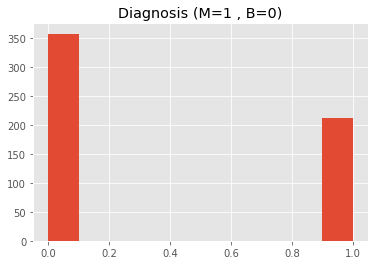

In [51]:
df.describe()
plt.hist(df['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

Creating a test set and a training set

In [52]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state= 10)

## Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)
print("Linear Regression's Accuracy is:{}".format(lr.score(X_test,y_test)))

Linear Regression's Accuracy is:0.8566203245942927


In [54]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test,y_predict)
MSE

5.617526054432188e-05

In [55]:
from sklearn.feature_selection import f_regression as fr
result = fr(X,y)
f_score = result[0]
p_values = result[1]

columns = list(X.columns)
print(" ")
print(" ")
print(" ")

print("     Features                     ","F-Score  ","P-Values")
print("     ------------                   --------  ---------")

for i in range(0,len(columns)):
    f1 = "%4.2f" % f_score[i]
    p1 = "%2.6f" % p_values[i]
    print("    ",columns[i].ljust(25),f1.rjust(12),"",p1.rjust(8))

 
 
 
     Features                      F-Score   P-Values
     ------------                   --------  ---------
     diagnosis                        66.44  0.000000
     radius_mean                       0.03  0.866442
     texture_mean                      8.17  0.004408
     perimeter_mean                    1.48  0.224329
     area_mean                         0.01  0.929114
     smoothness_mean                 188.31  0.000000
     compactness_mean                507.87  0.000000
     concavity_mean                  204.59  0.000000
     concave points_mean              89.18  0.000000
     symmetry_mean                   134.91  0.000000
     fractal_dimension_mean          811.70  0.000000
     radius_se                         1.40  0.237880
     texture_se                        1.18  0.276947
     perimeter_se                      4.17  0.041637
     area_se                           0.17  0.676320
     smoothness_se                     5.90  0.015452
     compactness_se 

In [56]:
#we just need to keep the p value > 0.5 features
new_features = []

for j in range(0, len(columns)):
      if float(result[1][j]) <= 0.5:
        new_features.append(X.columns[j])
new_features

['diagnosis',
 'texture_mean',
 'perimeter_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst']

In [57]:
X_train_lr = X_train[new_features]
X_test_lr = X_test[new_features]
lr_new = LinearRegression()
lr_new.fit(X_train_lr,y_train)
new_y_predict = lr_new.predict(X_test_lr)
MSE_new = mean_squared_error(y_test,new_y_predict)
MSE_new

5.874104075536601e-05

## Logistic Regression

Logistic regression is widely used for classification of discrete data. In this case we will use it for binary (1,0) classification.

In [58]:
#we select x,y axis and we normalize our data
y = df.diagnosis.values
x_data = df.drop("diagnosis",axis=1)
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [59]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(max_iter = 200)
lgr.fit(x_train,y_train)
print("Logistic Regression's Accuracy is:{}".format(lgr.score(x_test,y_test)))

Logistic Regression's Accuracy is:0.993006993006993


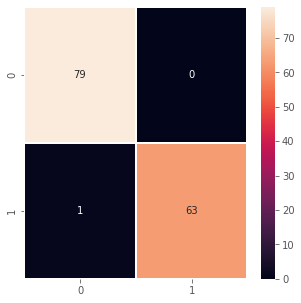

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_true = y_test 
y_pred = lgr.predict(x_test) #Predict data for eveluating 
cm = confusion_matrix(y_true,y_pred)

f,ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot = True,linewidth = 1,fmt =".0f",ax = ax)

In [61]:
MSE_logr = mean_squared_error(y_test,y_pred)
MSE_logr #??? why so low

0.006993006993006993

## Optional Part

In [62]:
x = (x_data -np.min(x_data))/(np.max(x_data)-np.min(x_data)).values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (30, 483)
x test:  (30, 86)
y train:  (483,)
y test:  (86,)


In [63]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] 
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [64]:
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

In [65]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

In [66]:
x_train.shape[1]

483

### Learning Rate is 1, Number of iterations is 100, Batch size (30, 483)

Cost after iteration 0: 0.692836
Cost after iteration 10: 0.498576
Cost after iteration 20: 0.404996
Cost after iteration 30: 0.350059
Cost after iteration 40: 0.313747
Cost after iteration 50: 0.287767
Cost after iteration 60: 0.268114
Cost after iteration 70: 0.252627
Cost after iteration 80: 0.240036
Cost after iteration 90: 0.229543


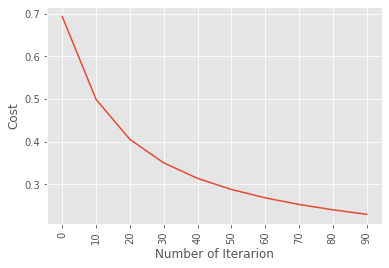

train accuracy: 94.40993788819875 %
test accuracy: 94.18604651162791 %


In [67]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 100) 

In [68]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.9767441860465116 
train accuracy: 0.968944099378882 


### Learning Rate is 0.5, Number of iterations is 1000, Batch size (30, 483)

Cost after iteration 0: 0.692836
Cost after iteration 10: 0.575708
Cost after iteration 20: 0.499805
Cost after iteration 30: 0.446038
Cost after iteration 40: 0.406171
Cost after iteration 50: 0.375453
Cost after iteration 60: 0.351033
Cost after iteration 70: 0.331122
Cost after iteration 80: 0.314544
Cost after iteration 90: 0.300500
Cost after iteration 100: 0.288426
Cost after iteration 110: 0.277916
Cost after iteration 120: 0.268668
Cost after iteration 130: 0.260455
Cost after iteration 140: 0.253100
Cost after iteration 150: 0.246466
Cost after iteration 160: 0.240444
Cost after iteration 170: 0.234946
Cost after iteration 180: 0.229900
Cost after iteration 190: 0.225248
Cost after iteration 200: 0.220940
Cost after iteration 210: 0.216936
Cost after iteration 220: 0.213202
Cost after iteration 230: 0.209708
Cost after iteration 240: 0.206429
Cost after iteration 250: 0.203343
Cost after iteration 260: 0.200431
Cost after iteration 270: 0.197679
Cost after iteration 280: 0.195

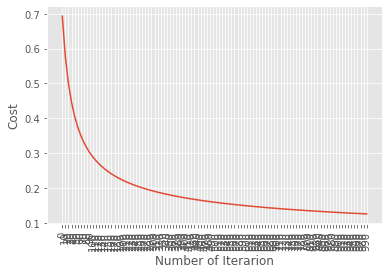

train accuracy: 97.10144927536231 %
test accuracy: 95.34883720930233 %


In [69]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.5, num_iterations = 1000) 

In [70]:
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.9767441860465116 
train accuracy: 0.968944099378882 


### Learning Rate is 2, Number of iterations is 50, Batch size (30, 483)

Cost after iteration 0: 0.692836
Cost after iteration 10: 0.402587
Cost after iteration 20: 0.312132
Cost after iteration 30: 0.266997
Cost after iteration 40: 0.239213


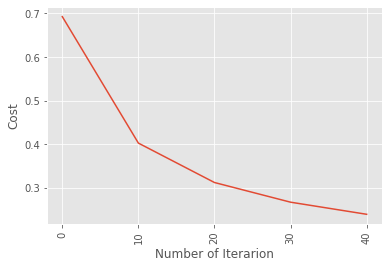

train accuracy: 94.40993788819875 %
test accuracy: 94.18604651162791 %


In [71]:
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 2, num_iterations = 50) 